In [54]:
import pandas as pd
import numpy  as np
import sweetviz as sv
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression , Ridge

In [3]:
lr_model = LinearRegression()data = pd.read_csv('/content/rideshare_kaggle.csv',encoding='utf8')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9.0,16.0,12.0,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2.0,27.0,11.0,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1.0,28.0,11.0,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4.0,30.0,11.0,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3.0,29.0,11.0,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


## Data Processing

In [4]:
data.drop(['id'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10367 entries, 0 to 10366
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    10366 non-null  float64
 1   hour                         10366 non-null  float64
 2   day                          10366 non-null  float64
 3   month                        10366 non-null  float64
 4   datetime                     10366 non-null  object 
 5   timezone                     10366 non-null  object 
 6   source                       10366 non-null  object 
 7   destination                  10366 non-null  object 
 8   cab_type                     10366 non-null  object 
 9   product_id                   10366 non-null  object 
 10  name                         10365 non-null  object 
 11  price                        9564 non-null   float64
 12  distance                     10365 non-null  float64
 13  surge_multiplier

In [6]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,1.036600e+04,10366.000000,10366.000000,10366.000000,9564.000000,10365.000000,10365.000000,10365.000000,10365.000000,10365.000000,...,10365.000000,1.036500e+04,10365.000000,1.036500e+04,10365.000000,1.036500e+04,10365.000000,1.036500e+04,10365.000000,1.036500e+04
mean,1.544033e+09,11.529037,17.912406,11.576982,16.336836,2.142797,1.013266,42.338241,-71.066284,39.577630,...,0.037658,1.544028e+09,33.475802,1.544026e+09,45.229117,1.544032e+09,29.747679,1.544033e+09,41.940135,1.544032e+09
std,6.978901e+05,6.993062,9.999346,0.494062,9.170533,1.127278,0.090988,0.047737,0.020337,6.776403,...,0.055435,6.878188e+05,6.527322,6.864689e+05,5.665996,6.870676e+05,7.126106,6.834943e+05,6.947563,6.879761e+05
min,1.543207e+09,0.000000,1.000000,11.000000,2.500000,0.300000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543439e+09,5.000000,13.000000,11.000000,9.000000,1.250000,1.000000,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543726e+09,12.000000,17.000000,12.000000,13.500000,2.060000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543684e+09,34.240000,1.543666e+09,44.680000,1.543691e+09,30.190000,1.543662e+09,40.950000,1.543691e+09
75%,1.544811e+09,17.000000,28.000000,12.000000,22.500000,2.860000,1.000000,42.364700,-71.054200,43.580000,...,0.095400,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.090000,1.544818e+09
max,1.550000e+09,23.000000,30.000000,12.000000,80.000000,7.460000,2.500000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [7]:
data['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [8]:
timestamp1 = 1.544953e+09
timestamp2 = 1.543284e+09
timestamp3 = 1.543367e+09
timestamp4 = 1.543554e+09
timestamp5 = 1.543463e+09
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 09:36:40
dt_object = 2018-11-27 02:00:00
dt_object = 2018-11-28 01:03:20
dt_object = 2018-11-30 05:00:00
dt_object = 2018-11-29 03:43:20


In [10]:
encoder = LabelEncoder()
object_features = ['datetime','timezone','product_id','destination','short_summary','long_summary','name','source','icon','cab_type']
for feature in  object_features:
  data[feature]  = encoder.fit_transform(data[feature])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10367 entries, 0 to 10366
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    10366 non-null  float64
 1   hour                         10366 non-null  float64
 2   day                          10366 non-null  float64
 3   month                        10366 non-null  float64
 4   datetime                     10367 non-null  int64  
 5   timezone                     10367 non-null  int64  
 6   source                       10367 non-null  int64  
 7   destination                  10367 non-null  int64  
 8   cab_type                     10367 non-null  int64  
 9   product_id                   10367 non-null  int64  
 10  name                         10367 non-null  int64  
 11  price                        9564 non-null   float64
 12  distance                     10365 non-null  float64
 13  surge_multiplier

In [12]:
data.isna().sum()

timestamp                        1
hour                             1
day                              1
month                            1
datetime                         0
timezone                         0
source                           0
destination                      0
cab_type                         0
product_id                       0
name                             0
price                          803
distance                         2
surge_multiplier                 2
latitude                         2
longitude                        2
temperature                      2
apparentTemperature              2
short_summary                    0
long_summary                     0
precipIntensity                  2
precipProbability                2
humidity                         2
windSpeed                        2
windGust                         2
windGustTime                     2
visibility                       2
temperatureHigh                  2
temperatureHighTime 

In [13]:
price_mean = data['price'].mean()
data['price'].fillna(price_mean,inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
price = data['price']
data.drop('price',axis=1,inplace=True)
data = data.join(price)

In [16]:
datas = data.iloc[:,:-1]
data['price'] = data['price'].astype('int64')
labels = data.iloc[:,-1]

In [17]:
xtrain , xtest , ytrain , ytest = train_test_split(datas,labels)

In [18]:
selector = RidgeCV()
selector.fit(xtrain, ytrain)

RidgeCV()

In [19]:
print(f"model score on training data: {selector.score(xtrain, ytrain)}")
print(f"model score on testing data: {selector.score(xtest, ytest)}")

model score on training data: 0.5093725869469568
model score on testing data: 0.5144655333430108


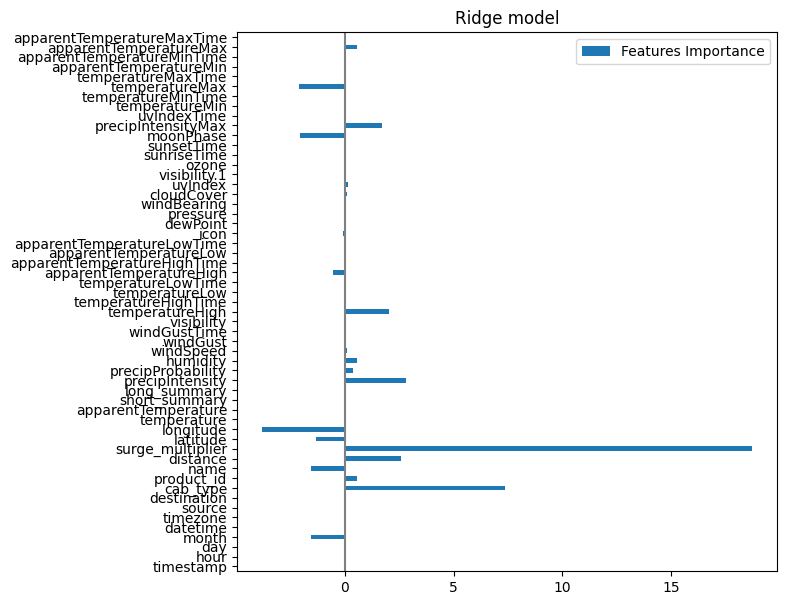

In [20]:
scores = pd.DataFrame(selector.coef_, columns=["Features Importance"], index=xtrain.columns)

scores.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

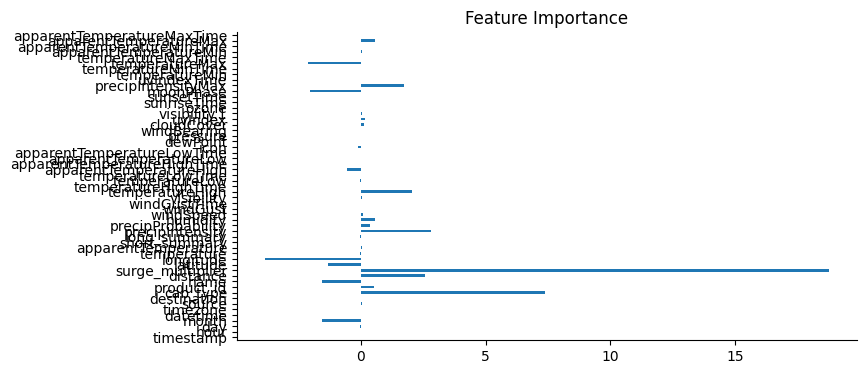

In [21]:
importance_cols = scores[scores['Features Importance'] > 0].T.columns
scores['Features Importance'].plot(kind='barh', figsize=(8, 4), title='Feature Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
df = data[importance_cols]
df = df.join(labels)

## EDA

In [23]:
df.head()

,timestamp,datetime,source,destination,cab_type,product_id,distance,surge_multiplier,apparentTemperature,short_summary,...,visibility.1,ozone,sunriseTime,precipIntensityMax,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMax,price
0,1.544953e+09,3302,5,7,0,9,0.44,1.0,37.12,4,...,10.000,303.8,1.544962e+09,0.1276,39.89,1.545012e+09,1.544969e+09,33.73,38.07,5
1,1.543284e+09,547,5,7,0,13,0.44,1.0,37.35,8,...,4.786,291.1,1.543233e+09,0.1300,40.49,1.543234e+09,1.543252e+09,36.20,43.92,11
2,1.543367e+09,967,5,7,0,8,0.44,1.0,32.93,0,...,10.000,315.7,1.543319e+09,0.1064,35.36,1.543378e+09,1.543320e+09,31.04,44.12,7
3,1.543554e+09,1790,5,7,0,11,0.44,1.0,29.63,0,...,10.000,291.1,1.543492e+09,0.0000,34.67,1.543550e+09,1.543511e+09,30.30,38.53,26
4,1.543463e+09,1408,5,7,0,12,0.44,1.0,30.88,6,...,10.000,347.7,1.543406e+09,0.0001,33.10,1.543403e+09,1.543421e+09,29.11,35.75,9


In [24]:
data_report = sv.analyze(df.iloc[:,:-1])
data_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: >

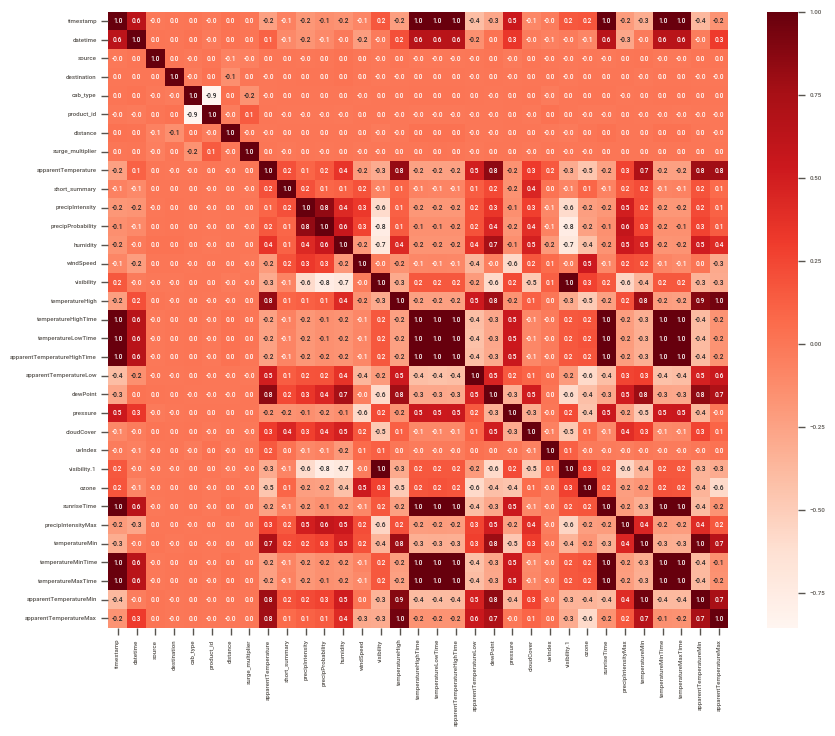

In [25]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=0.5)
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,fmt=".1f",cmap="Reds")

<Axes: xlabel='price'>

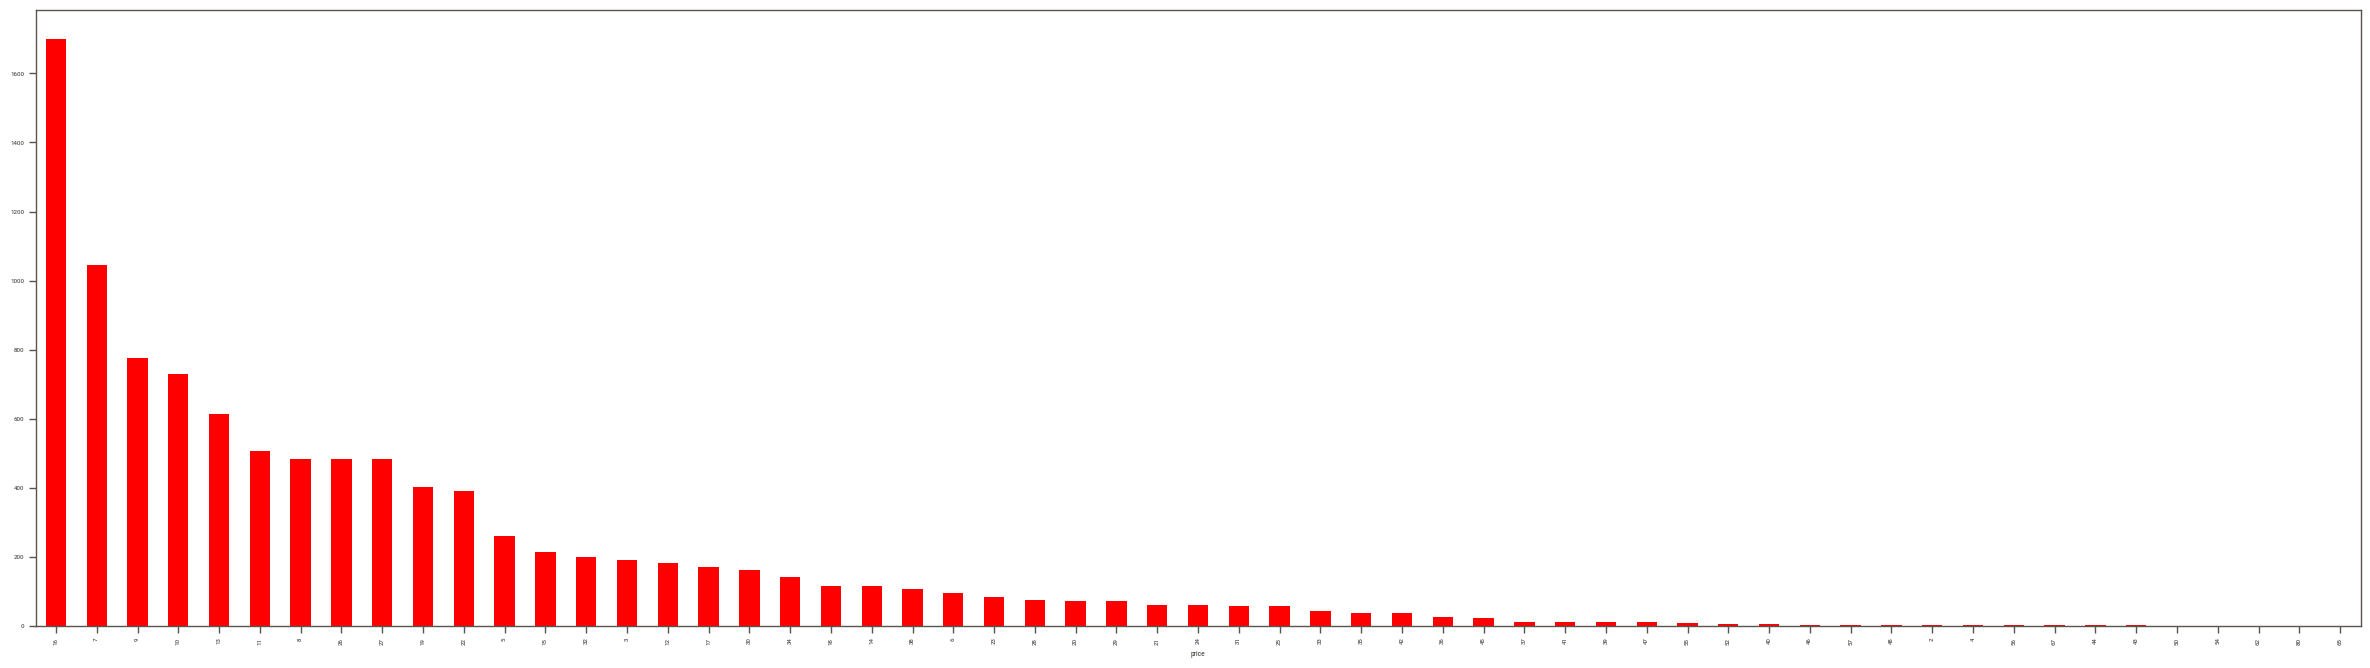

In [27]:
df['price'].value_counts().plot(kind='bar',figsize=(30,8),color='red')

<Axes: xlabel='precipProbability'>

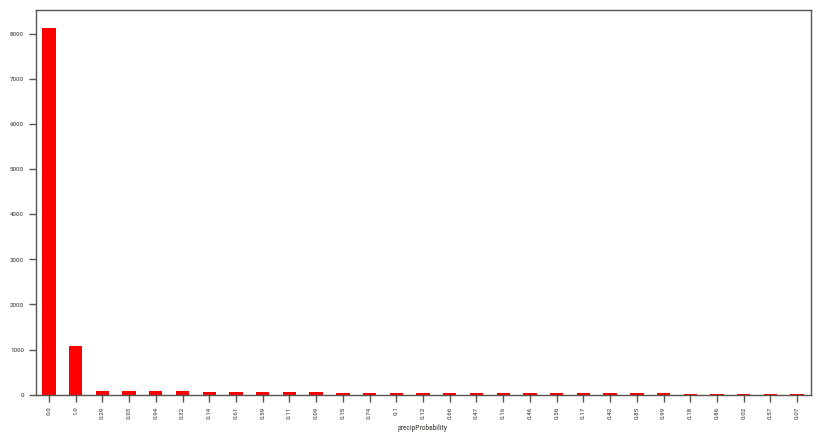

In [28]:
df['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

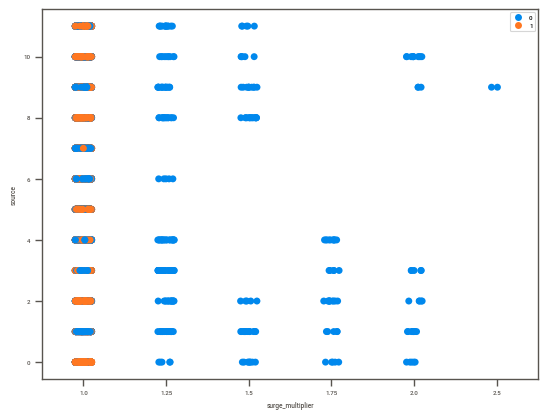

In [30]:
sns.stripplot(data=df, x='surge_multiplier', y='source',hue='cab_type')
plt.legend()

## Model Building and evaluation

In [50]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)

### GradientBoostingRegressor

In [34]:
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [35]:
gbr.score(X_train, Y_train)

0.9823246563358723

In [36]:
gbr_pred = gbr.predict(X_test)

In [40]:
def show_score(actual_value , prediction_value):
  MAE_score = metrics.mean_absolute_error(actual_value , prediction_value)
  MSE_score = np.sqrt(metrics.mean_squared_error(actual_value, prediction_value))
  R2_score =  metrics.r2_score(actual_value, prediction_value)
  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
  sns.distplot(actual_value,  color="g", label="Actual Value",hist=False)
  plt.legend()
  print(MAE_score,'\n',MSE_score,'\n',R2_score)

<ipython-input-40-7e42bee3324f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
<ipython-input-40-7e42bee3324f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_value,  color="g", label="Actual Value",his

1.0654397903485113 
 1.5882307614628444 
 0.9647985645201436


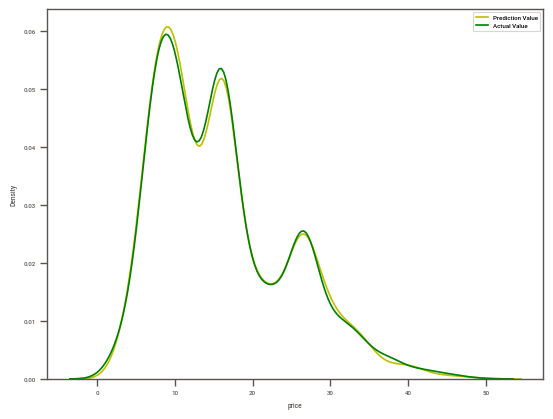

In [41]:
show_score(prediction_value =gbr_pred ,actual_value =Y_test)

### Linear Regression

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [52]:
lr_score = lr_model.score(X_train,Y_train)
y_pred_lr = lr_model.predict(X_test)

<ipython-input-40-7e42bee3324f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
<ipython-input-40-7e42bee3324f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_value,  color="g", label="Actual Value",his

6.3406223787711244 
 7.94507335303011 
 0.1691925612024121


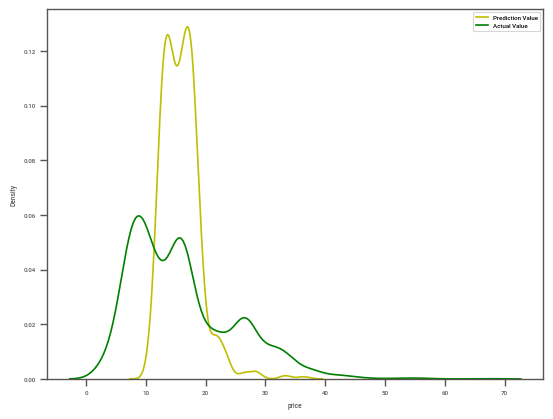

In [53]:
show_score(prediction_value =y_pred_lr ,actual_value =Y_test)

### Ridg

In [56]:
ridge_model = Ridge()

In [57]:
ridge_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.91354e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [60]:
ridge_score = ridge_model.score(X_train,Y_train)
y_pred_ridge = ridge_model.predict(X_test)

<ipython-input-40-7e42bee3324f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
<ipython-input-40-7e42bee3324f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_value,  color="g", label="Actual Value",his

6.341918955286369 
 7.947263424509404 
 0.1687344714218869


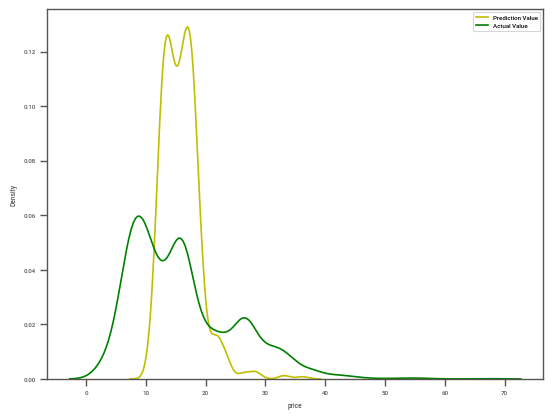

In [62]:
show_score(prediction_value =y_pred_ridge ,actual_value =Y_test)

## After preprocessing the data time series  and using different models, the GradientBoostingRegressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) model had the best accuracy